In [16]:
from scipy import stats
import numpy as np

## 3.1

In [1]:
n_a = 32
av_a = 62.2
std_a = 11.0

n_b = 35
av_b = 71.4
std_b = 10.8

### (1a) 

In [17]:
l_al = stats.norm.ppf(0.025)
r_al = stats.norm.ppf(0.975)
l = l_al*11/np.sqrt(n_a) + av_a
r = r_al*11/np.sqrt(n_a) + av_a
print(l, r)

58.388764483038386 66.01123551696162


### (1b) 

In [18]:
l_al = stats.norm.ppf(0.025)
r_al = stats.norm.ppf(0.975)
l = l_al*10.8/np.sqrt(n_b) + av_b
r = r_al*10.8/np.sqrt(n_b) + av_b
print(l, r)

67.82202069459885 74.97797930540116


### (2a)

In [19]:
l_al = stats.t.ppf(0.025, n_a-1)
r_al = stats.t.ppf(0.975, n_a-1)
l = l_al*11/np.sqrt(n_a) + av_a
r = r_al*11/np.sqrt(n_a) + av_a
print(l, r)

58.23407708226288 66.16592291773713


## (2b)

In [20]:
l_al = stats.t.ppf(0.025, n_b-1)
r_al = stats.t.ppf(0.975, n_b-1)
l = l_al*10.8/np.sqrt(n_b) + av_b
r = r_al*10.8/np.sqrt(n_b) + av_b
print(l, r)

67.69007019761116 75.10992980238885


## 3.2

In [21]:
n = 2500
av_x = 32.8
sig = 29.5

In [24]:
l_al = stats.t.ppf(0.025, n-1)
r_al = stats.t.ppf(0.975, n-1)
l = l_al*sig/np.sqrt(n) + av_x
r = r_al*sig/np.sqrt(n) + av_x
print(l, r)

31.643060902325196 33.9569390976748


In [26]:
n = 25
av_x = 32.8
sig = 29.5

In [28]:
l_al = stats.t.ppf(0.025, n-1)
r_al = stats.t.ppf(0.975, n-1)
l = l_al*sig/np.sqrt(n) + av_x
r = r_al*sig/np.sqrt(n) + av_x
print(l, r)

20.622998486394675 44.977001513605316


## 3.3 

In [32]:
N = 100_000
n = 2500
x = 1500
p_h = x/n

## 章末問題

### 3.1

In [8]:
import numpy as np
from scipy import stats

In [3]:
a = np.array([0.813, 0.820, 0.771, 0.908, 0.944, 0.771, 0.763, 0.996, 0.886])
b = np.array([1.045, 1.100, 1.013, 1.009, 1.204, 0.996, 1.352, 1.173, 0.934])

In [5]:
def div(_a, _b):
    return (_a - np.mean(_a))@(_b - np.mean(_b))

In [13]:
F_val = div(a,a)/div(b,b)

In [46]:
F_val

0.4188072930764036

In [45]:
print(stats.f.ppf(0.025,len(a)-1,len(b)-1))
print(stats.f.ppf(0.975,len(a)-1,len(b)-1))

0.2255676466069824
4.433259889182375


In [48]:
mix_sig2 = (div(a,a)+div(b,b))/(2*len(a)-2)

In [53]:
t_val = (np.mean(a) - np.mean(b))/np.sqrt(mix_sig2*2/(len(a)))

In [54]:
t_val

-4.618273306048572

In [57]:
print(stats.t.ppf(0.025, 2*(len(a)-1)))
print(stats.t.ppf(0.975, 2*(len(b)-1)))

-2.1199052992210112
2.1199052992210112


In [59]:
ro = np.sqrt(mix_sig2*2/(len(a)))

In [61]:
l = -1*np.abs(np.mean(a) - np.mean(b)) + stats.t.ppf(0.025, 2*(len(a)-1))*ro
r = -1*np.abs(np.mean(a) - np.mean(b)) + stats.t.ppf(0.975, 2*(len(a)-1))*ro
print(l,r) 

-0.3491934407784828 -0.12947322588818377


## 3.2

In [63]:
import pandas as pd

In [65]:
df = pd.DataFrame({"A1":[70,73,75,72], "A2":[74,74,77, 75], "A3": [78, 75, 79, 80], "A4":[76, 78, 75, 75]})

In [73]:
myu_all = df.mean().mean()
myu_lists = df.mean().values

In [78]:
stats.f_oneway(df['A1'], df['A2'], df['A3'], df['A4'])

F_onewayResult(statistic=6.435897435897436, pvalue=0.00761530831377942)

In [105]:
tmp_list = df.sum()
SA = ((myu_lists - myu_all)@(myu_lists - myu_all))*4
SE = (df*df).sum().sum() - (tmp_list@tmp_list.T)/4

In [109]:
F_val = (SA/(4-1))/(SE/(16-4))

In [121]:
def sig_range(data ,upper = 0.975, lower = 0.025):
    a = np.mean(data)
    sig = div(data, data)/(len(data)-1)
    l_prob = stats.t.ppf(lower, len(data)-1)
    r_prob = stats.t.ppf(upper, len(data)-1)
    return a + l_prob * np.sqrt(sig/(len(data)-1)), a + r_prob * np.sqrt(sig/(len(data)-1))

In [123]:
for key in df.keys():
    print(sig_range(df[key]))

(68.67517555496222, 76.32482444503778)
(72.40154347274932, 77.59845652725068)
(74.0307920912739, 81.9692079087261)
(73.40154347274932, 78.59845652725068)


## 3.6

In [125]:
import statsmodels

In [126]:
A_labels = ["A1", "A2", "A3"]
B_labels = [f"B{i}" for i in range(1,5)]

In [131]:
counter = 0;
data = []
for a in A_labels:
    for b in B_labels:
        data.append([a,b,ds[counter]])
        counter +=1 
        data.append([a,b,ds[counter]])
        counter +=1 


In [134]:
df = pd.DataFrame(data, columns= ["LabelA","LabelB", "val"])

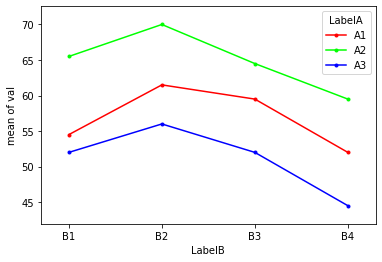

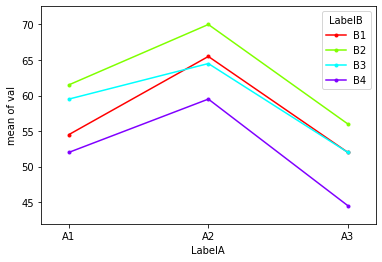

In [139]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(df["LabelB"], df["LabelA"], df["val"]);
interaction_plot(df["LabelA"], df["LabelB"], df["val"]);